In [2]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

/home/jtloong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
data = pd.read_csv('TrainExer 3-1.csv')

# Section B 

In [4]:
data['BookMarket_Square'] = np.square(data['BookMarket'])

In [6]:
y = np.asarray(data['Index'])
for i, num in enumerate(y):
    y[i] = num.replace(",", '')

y = y.astype(np.float)
y = np.log(y)

new_y = []
for i, num in enumerate(y):
#     print(i)
#     print(num)
#     print(y[i+1])
    if(i ==(len(y) - 1)):
        break
    else:
        new_y.append([y[i+1] - num])

new_y = np.array(new_y)

In [7]:
x = data[['BookMarket', 'BookMarket_Square']]

In [8]:
lm = LinearRegression()
lm.fit(x[1:], new_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print(lm.coef_)
print(lm.intercept_)

[[ 0.23683938 -0.3466818 ]]
[ 0.05633139]


In [10]:
predictions = lm.predict(x[1:])

In [14]:
import matplotlib.pyplot as plt
% matplotlib inline

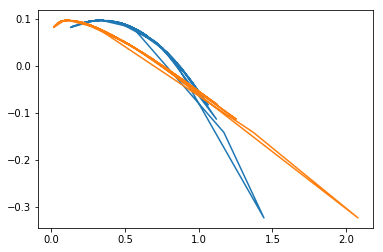

In [15]:
plt.plot(x[1:], predictions)

# Section C

In [17]:
data.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation,BookMarket_Square
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.133,-2.767,-0.021176,0.140392
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355,-2.870,-0.009793,0.067427
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096,-2.589,0.001830,0.114554
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.751,-2.761,-0.060665,0.307742
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.293,-2.589,-0.095711,1.370613


In [18]:
data['dummy_1980'] = data['Year'].apply(lambda x: 0 if x < 1980 else 1)

In [21]:
new_x = data[['BookMarket', 'dummy_1980']]

In [22]:
lm = LinearRegression()
lm.fit(new_x[1:], new_y)
print(lm.coef_)
print(lm.intercept_)

[[-0.23282714 -0.01910849]]
[ 0.19574566]


In [26]:
from sklearn.metrics import r2_score, mean_squared_error
predictions = lm.predict(new_x[1:])
r2_score(new_y, predictions)

0.081520669929985634